In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving footballer_input_high_corr_standard.csv to footballer_input_high_corr_standard.csv


In [ ]:
uploaded2 = files.upload()

Saving footballer_target_high_corr_standard.csv to footballer_target_high_corr_standard.csv


In [ ]:
import io
footballer_input = pd.read_csv(io.BytesIO(uploaded['footballer_input_high_corr_standard.csv']))
footballer_target = pd.read_csv(io.BytesIO(uploaded2['footballer_target_high_corr_standard.csv']))

In [ ]:
footballer_input

,PPA,Cmp_Total,Rk,Att Pen_Touches,TotDist_Total,SoT_Standard,Att 3rd_Touches,npxG+xAG_Expected,CPA_Carries,Cmp_Short,...,Compe_Premier League,Compe_Serie A,Position_Central Midfield,Position_Centre-Back,Position_Centre-Forward,Position_Defensive Midfield,Position_Left Winger,Position_Left-Back,Position_Right Winger,Position_Right-Back
0,0.814335,1.372565,12,-0.702122,1.350722,-0.358424,0.333384,-0.357787,-0.449363,1.150196,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.322947,0.203088,12,1.591620,-0.081721,2.178451,1.655210,1.369322,0.405010,0.655444,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.796269,-1.173461,12,-0.423153,-1.132685,-0.224904,-0.656579,-0.465731,-0.259502,-1.205763,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-1.050575,-0.549896,12,-0.733118,-0.371736,-0.491944,-0.960318,-0.465731,-0.734154,-0.817030,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.136186,-0.829912,12,-0.826108,-0.812970,-0.892503,-0.425963,-0.735592,-0.354433,-0.828810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,-0.040773,1.216125,20,-0.386235,0.881403,-0.554060,1.096042,-0.447382,0.070588,1.782892,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9154,-0.868495,0.816075,19,-0.643643,1.178067,-0.728659,-1.165800,-0.828457,-0.619947,0.086153,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9155,1.614671,-0.025698,19,1.562712,-0.136761,2.763317,2.395399,1.457993,3.062908,0.283592,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9156,-1.052433,-0.775792,13,-0.937823,-0.581602,-0.728659,-1.358297,-1.018995,-0.735037,-1.141669,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
footballer_target

,Price
0,1.00
1,5.00
2,1.50
3,6.00
4,0.75
...,...
9153,6.50
9154,4.00
9155,12.00
9156,2.80


### Neural Network Process

In [ ]:
!pip install keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from keras import optimizers

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(footballer_input, footballer_target, test_size=0.3, random_state=42)

In [ ]:
indices_25 = np.where(y_test <= 3 )[0]
indices_50 = np.where((y_test > 3) & (y_test <= 8))[0]
indices_75 = np.where((y_test > 8) & (y_test <= 20))[0]
indices_100 = np.where(y_test >20 )[0]

# Filter X_test and y_test based on the indices
X_test_25 = X_test.iloc[indices_25]
y_test_25 = y_test.iloc[indices_25]

X_test_50 = X_test.iloc[indices_50]
y_test_50 = y_test.iloc[indices_50]

X_test_75 = X_test.iloc[indices_75]
y_test_75 = y_test.iloc[indices_75]

X_test_100 = X_test.iloc[indices_100]
y_test_100 = y_test.iloc[indices_100]

In [ ]:
y_test_75

,Price
8611,18.0
1406,15.0
5457,12.0
1156,14.0
1057,15.0
...,...
4712,12.0
1677,18.0
2952,9.5
6848,14.0


In [ ]:
from keras.regularizers import l1
from keras import regularizers

In [ ]:
#input value
model = Sequential()
model.add(Dense(41, input_dim = 41, activation = 'relu'))
model.add(Dense(20, activation = 'relu',kernel_regularizer=regularizers.L1(0.001)))
model.add(Dense(10, activation = 'relu',kernel_regularizer=regularizers.L1(0.001)))
model.add(Dense(5, activation = 'relu',kernel_regularizer=regularizers.L1(0.001)))


In [ ]:
#output value
model.add(Dense(1, activation = 'relu'))

In [ ]:
optimizer = optimizers.Adam(lr=0.005)

In [ ]:
model.compile(loss = 'mean_squared_error', optimizer = optimizer, metrics = ['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 41)                1722      
                                                                 
 dense_1 (Dense)             (None, 20)                840       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 5)                 55        
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 2833 (11.07 KB)
Trainable params: 2833 (11.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### model.summary()

In [ ]:
history = model.fit(X_train,y_train,validation_split = 0.2, epochs = 150)

Epoch 1/150
161/161 [==============================] - 3s 9ms/step - loss: 268.4182 - mae: 10.2002 - val_loss: 232.5091 - val_mae: 9.0086
Epoch 2/150
161/161 [==============================] - 1s 4ms/step - loss: 203.9349 - mae: 8.9667 - val_loss: 203.9054 - val_mae: 8.5830
Epoch 3/150
161/161 [==============================] - 1s 4ms/step - loss: 185.0151 - mae: 8.4687 - val_loss: 188.0905 - val_mae: 8.5540
Epoch 4/150
161/161 [==============================] - 1s 4ms/step - loss: 170.4081 - mae: 8.0687 - val_loss: 172.4102 - val_mae: 7.7851
Epoch 5/150
161/161 [==============================] - 1s 6ms/step - loss: 158.5997 - mae: 7.6761 - val_loss: 171.3311 - val_mae: 7.2505
Epoch 6/150
161/161 [==============================] - 1s 5ms/step - loss: 152.1441 - mae: 7.4630 - val_loss: 157.0077 - val_mae: 7.1568
Epoch 7/150
161/161 [==============================] - 1s 6ms/step - loss: 146.5158 - mae: 7.3581 - val_loss: 153.2950 - val_mae: 6.9388
Epoch 8/150
161/161 [===================

In [ ]:
import matplotlib.pyplot as plt

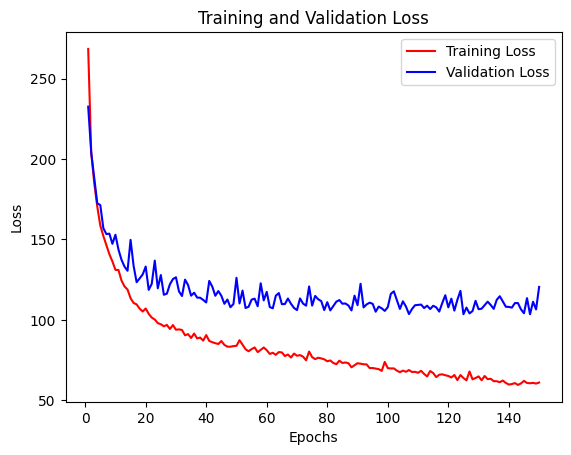

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "r", label = "Training Loss" )
plt.plot(epochs,val_loss, "b", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(X_test[10:20])
print("Predicted value are\n", predictions)
print("Real Value are\n", y_test[10:20])

1/1 [==============================] - 0s 120ms/step
Predicted value are
 [[ 2.4146218]
 [ 3.1610703]
 [11.78513  ]
 [ 8.926812 ]
 [11.915329 ]
 [ 2.2544715]
 [ 4.1433434]
 [ 1.6098648]
 [15.4072075]
 [10.126351 ]]
Real Value are
       Price
2310    7.0
1509    5.0
5457   12.0
5740    8.0
1156   14.0
4359    4.5
7039    4.5
5613    0.9
1057   15.0
8136    3.0


In [ ]:
y_train.describe()

,Price
count,6410.000000
mean,14.978479
std,19.422917
min,0.050000
25%,3.000000
50%,8.000000
75%,20.000000
max,180.000000


In [ ]:
predictions = model.predict(X_test)

86/86 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
explained_variance_score(y_test,predictions)

0.718886430127544

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
r2_score(predictions,y_test)

0.5735651445642811

In [ ]:
import numpy as np
np.sqrt(mean_squared_error(y_test,predictions))

10.252520060005322

In [ ]:
mean_absolute_error(y_test,predictions)

5.828104327252512

### Prediction for median 25, 50, and 75 value

#### 25

In [ ]:
predictions25 = model.predict(X_test_25[10:20])
print("Predicted value are\n", predictions25)
print("Real Value are\n", y_test_25[10:20])

1/1 [==============================] - 0s 23ms/step
Predicted value are
 [[7.453823 ]
 [9.304052 ]
 [2.8945475]
 [2.9812617]
 [1.4759008]
 [1.7488348]
 [1.757152 ]
 [2.8346577]
 [4.802861 ]
 [2.13545  ]]
Real Value are
       Price
8917    3.0
93      2.5
3787    2.8
8127    2.0
6255    1.0
4296    1.5
1046    3.0
7700    2.5
6253    2.5
7759    2.0


In [ ]:
predictions25 = model.predict(X_test_25)

23/23 [==============================] - 0s 2ms/step


In [ ]:
mean_absolute_error(y_test_25,predictions25)

1.6613736109813277

#### 50

In [ ]:
predictions50 = model.predict(X_test_50[10:20])
print("Predicted value are\n", predictions50)
print("Real Value are\n", y_test_50[10:20])

1/1 [==============================] - 0s 27ms/step
Predicted value are
 [[ 2.126702 ]
 [11.08124  ]
 [ 8.148296 ]
 [ 2.6357262]
 [ 6.381841 ]
 [ 7.8820558]
 [ 3.1920624]
 [20.492907 ]
 [ 8.19494  ]
 [ 4.4408765]]
Real Value are
       Price
1010    3.5
6231    8.0
3872    4.5
2484    3.2
1671    8.0
4421    6.0
3418    5.5
4561    6.0
47      5.0
4317    7.0


In [ ]:
predictions50 = model.predict(X_test_50)

23/23 [==============================] - 0s 1ms/step


In [ ]:
mean_absolute_error(y_test_50,predictions50)

2.546647247534032

#### 75

In [ ]:
predictions75 = model.predict(X_test_75[10:20])
print("Predicted value are\n", predictions75)
print("Real Value are\n", y_test_75[10:20])

1/1 [==============================] - 0s 31ms/step
Predicted value are
 [[16.616917 ]
 [11.355995 ]
 [10.155422 ]
 [13.664446 ]
 [ 9.504169 ]
 [22.15193  ]
 [41.395103 ]
 [14.506882 ]
 [26.034927 ]
 [ 4.7267923]]
Real Value are
       Price
2926    9.5
1314   10.0
7111   12.0
315     9.0
5527   15.0
2683   20.0
8713   12.0
1739   18.0
3181   14.5
6968    9.0


In [ ]:
predictions75 = model.predict(X_test_75)

23/23 [==============================] - 0s 2ms/step


In [ ]:
mean_absolute_error(y_test_75,predictions75)

5.596317419019239

#### 100

In [ ]:
predictions100 = model.predict(X_test_100[10:20])
print("Predicted value are", predictions100)
print("Real Value are", y_test_100[10:20])

1/1 [==============================] - 0s 26ms/step
Predicted value are [[ 11.817539]
 [100.0451  ]
 [ 17.90664 ]
 [ 21.281652]
 [ 23.652628]
 [ 45.128975]
 [ 24.553123]
 [ 13.157909]
 [ 15.058983]
 [ 27.865147]]
Real Value are       Price
3131   24.0
5920   90.0
3799   25.0
6781   32.0
7341   35.0
5197   35.0
3498   40.0
2865   25.5
4696   23.0
8840   55.0


In [ ]:
predictions_100 = model.predict(X_test_100)

18/18 [==============================] - 0s 2ms/step


In [ ]:
mean_absolute_error(y_test_100,predictions_100)

15.580026461238827

### Check the attributes importance

In [ ]:
from collections import defaultdict
from sklearn.metrics import mean_squared_error

In [ ]:
# def permutation_importance(model, X, y, metric, n_iterations=10):
#     baseline_score = metric(y, model.predict(X))
#     importance_scores = defaultdict(list)

#     for feature_index in range(X.shape[1]):
#         X_permuted = X.copy()
#         X_permuted[:, feature_index] = np.random.permutation(X_permuted[:, feature_index])

#         for _ in range(n_iterations):
#             score = metric(y, model.predict(X_permuted))
#             importance = baseline_score - score
#             importance_scores[feature_index].append(importance)

#     return {feature_index: np.mean(scores) for feature_index, scores in importance_scores.items()}

In [ ]:
# importance_scores = permutation_importance(model, X_test, y_test, mean_squared_error)

In [ ]:
# print("\nFeature Importance Scores:")
# for feature_index, importance_score in importance_scores.items():
#     print(f"Feature {feature_index}: {importance_score}")

In [ ]:
import tensorflow as tf
def calculate_feature_importance(model, X):
    with tf.GradientTape() as tape:
        tape.watch(X)
        predictions = model(X)

    gradients = tape.gradient(predictions, X)
    feature_importance = tf.reduce_mean(gradients, axis=0)
    return feature_importance.numpy()

In [ ]:
# sample_index = 0
importance = calculate_feature_importance(model,tf.convert_to_tensor(X_train[10:11].values, dtype=tf.float32))
print("Feature Importance:", importance)

Feature Importance: [ 0.56197315  1.2699883  -0.36923775  2.035034    1.3855757  -0.11237872
 -1.4187803   1.622949    0.79363596 -0.4712498   0.08712052 -0.9157631
  1.460393    0.06475186  0.38406008 -0.9254891  -0.2212498  -0.15829678
  0.6923598   1.405144    0.43867838  0.6269636  -0.16802776 -1.4724411
  2.1752758   0.20091254  0.02847508  0.59794194  0.3688287  -0.8451482
 -3.5583348   8.010743   -0.24791348 -1.047564   -1.7592567  -2.970791
  0.01202077  0.1587981  -0.69681585  0.19251287 -0.30485404]


### Check the attribute with the most significant importance to the neural network

In [ ]:
min_index = np.argmin((importance))
min_index

30

In [ ]:
max_index = np.argmax((importance))
max_index

31

In [ ]:
importance[max_index]

8.010743

In [ ]:
footballer_input.columns[min_index]

'Compe_Ligue 1'

In [ ]:
footballer_input.columns[max_index]

'Compe_Premier League'